In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
warnings.filterwarnings('ignore')

In [4]:
comp = pd.read_csv('/Users/parvarora/Downloads/consumer_complaints.csv')
comp.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [5]:
comp['product'].value_counts()

product
Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: count, dtype: int64

In [6]:
comp['sub_product'].value_counts()

sub_product
Other mortgage                            74319
Conventional fixed mortgage               57182
Checking account                          44369
Other (i.e. phone, health club, etc.)     29617
I do not know                             21634
Conventional adjustable mortgage (ARM)    20941
Credit card                               20825
FHA mortgage                              19152
Non-federal student loan                  17969
Medical                                   13297
Vehicle loan                              12168
Other bank product/service                10895
Payday loan                                9684
Home equity loan or line of credit         8944
Installment loan                           5279
Savings account                            3996
VA mortgage                                3735
Mortgage                                   3433
(CD) Certificate of deposit                2839
Auto                                       2523
International money transfer

In [7]:
comp['company'].value_counts()

company
Bank of America                          55998
Wells Fargo & Company                    42024
JPMorgan Chase & Co.                     33881
Equifax                                  31828
Experian                                 30905
                                         ...  
Capital Recovery Corporation                 1
Brian A. Blitz, P.A.                         1
Account Information Management, Corp.        1
Bristlecone, Inc.                            1
ICUL Service Corporation                     1
Name: count, Length: 3605, dtype: int64

In [8]:
comp.isna().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

In [9]:
product_percentage = round(comp["product"].value_counts() / len(comp["product"]) * 100,2)

print(product_percentage)

labels = list(product_percentage.index)
values = product_percentage.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']


product_pie = go.Pie(labels=labels, values=values,
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=2)))

layout = go.Layout(title='Product Types')

fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)

product
Mortgage                   33.54
Debt collection            18.18
Credit reporting           16.52
Credit card                11.96
Bank account or service    11.25
Consumer Loan               3.78
Student loan                2.85
Payday loan                 0.70
Money transfers             0.69
Prepaid card                0.44
Other financial service     0.10
Name: count, dtype: float64


In [10]:
comp1 = comp.loc[:,['consumer_complaint_narrative', 'product']]
comp1

,consumer_complaint_narrative,product
0,NaN,Mortgage
1,NaN,Mortgage
2,NaN,Credit reporting
3,NaN,Student loan
4,NaN,Debt collection
...,...,...
555952,NaN,Mortgage
555953,NaN,Mortgage
555954,NaN,Mortgage
555955,NaN,Debt collection


In [11]:
comp1 = comp1.dropna()
comp1

,consumer_complaint_narrative,product
190126,XXXX has claimed I owe them {$27.00} for XXXX ...,Debt collection
190135,Due to inconsistencies in the amount owed that...,Consumer Loan
190155,In XX/XX/XXXX my wages that I earned at my job...,Mortgage
190207,I have an open and current mortgage with Chase...,Mortgage
190208,XXXX was submitted XX/XX/XXXX. At the time I s...,Mortgage
...,...,...
553084,"XXXX XXXX is reporting incorrectly, payments h...",Credit reporting
553085,Reflecting incorrect payment status. Have been...,Credit reporting
553086,I have been paying {$180.00} a month through d...,Payday loan
553090,I recently became aware that Amerisave Mortgag...,Mortgage


In [12]:
comp1.isnull().sum()

consumer_complaint_narrative    0
product                         0
dtype: int64

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/parvarora/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/parvarora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/parvarora/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Clean the textual column
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

In [15]:
import re
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: word_tokenize(x))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: word_lemmatizer(x))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: ' '.join(x))
    return df

In [16]:
comp1.rename(columns={'consumer_complaint_narrative': 'complaints'}, inplace= True)
comp1.head()

,complaints,product
190126,XXXX has claimed I owe them {$27.00} for XXXX ...,Debt collection
190135,Due to inconsistencies in the amount owed that...,Consumer Loan
190155,In XX/XX/XXXX my wages that I earned at my job...,Mortgage
190207,I have an open and current mortgage with Chase...,Mortgage
190208,XXXX was submitted XX/XX/XXXX. At the time I s...,Mortgage


In [17]:
comp1_clean = clean_text(comp1,'complaints', 'complaints_clean')
comp1_clean

,complaints,product,complaints_clean
190126,XXXX has claimed I owe them {$27.00} for XXXX ...,Debt collection,xxxx claimed owe xxxx year despite proof payme...
190135,Due to inconsistencies in the amount owed that...,Consumer Loan,due inconsistency amount owed told bank amount...
190155,In XX/XX/XXXX my wages that I earned at my job...,Mortgage,xxxxxxxx wage earned job decreased almost half...
190207,I have an open and current mortgage with Chase...,Mortgage,open current mortgage chase bank xxxx chase re...
190208,XXXX was submitted XX/XX/XXXX. At the time I s...,Mortgage,xxxx submitted xxxxxxxx time submitted complai...
...,...,...,...
553084,"XXXX XXXX is reporting incorrectly, payments h...",Credit reporting,xxxx xxxx reporting incorrectly payment time v...
553085,Reflecting incorrect payment status. Have been...,Credit reporting,reflecting incorrect payment status time
553086,I have been paying {$180.00} a month through d...,Payday loan,paying month direct debit withdrawal checking ...
553090,I recently became aware that Amerisave Mortgag...,Mortgage,recently became aware amerisave mortgage corpo...


In [18]:
comp1_clean['product'].value_counts()

product
Debt collection            17552
Mortgage                   14919
Credit reporting           12526
Credit card                 7929
Bank account or service     5711
Consumer Loan               3678
Student loan                2128
Prepaid card                 861
Payday loan                  726
Money transfers              666
Other financial service      110
Name: count, dtype: int64

In [19]:
def x_rem(sent):
    sent = pd.DataFrame(re.sub(['x','xx','xxx','xxxx','xxxxx','xxxxxx','xxxxxx','xxxxxxxx','xxxxxxxxxxxx']," ", sent))
    return sent

In [20]:
def remove_stopwords(text,stopwords=['x','xx','xxx','xxxx','xxxxx','xxxxxx','xxxxxx','xxxxxxxx']):
    filtered_words = [word for word in text.split() if word.lower() not in stopwords]
    return" ".join(filtered_words)

In [21]:
comp1_clean['complaints_clean'] = comp1_clean['complaints_clean'].apply(remove_stopwords, stopwords)
comp1_clean

,complaints,product,complaints_clean
190126,XXXX has claimed I owe them {$27.00} for XXXX ...,Debt collection,claimed owe year despite proof payment sent ca...
190135,Due to inconsistencies in the amount owed that...,Consumer Loan,due inconsistency amount owed told bank amount...
190155,In XX/XX/XXXX my wages that I earned at my job...,Mortgage,wage earned job decreased almost half knew tro...
190207,I have an open and current mortgage with Chase...,Mortgage,open current mortgage chase bank chase reporti...
190208,XXXX was submitted XX/XX/XXXX. At the time I s...,Mortgage,submitted time submitted complaint dealt rushm...
...,...,...,...
553084,"XXXX XXXX is reporting incorrectly, payments h...",Credit reporting,reporting incorrectly payment time vehicle tur...
553085,Reflecting incorrect payment status. Have been...,Credit reporting,reflecting incorrect payment status time
553086,I have been paying {$180.00} a month through d...,Payday loan,paying month direct debit withdrawal checking ...
553090,I recently became aware that Amerisave Mortgag...,Mortgage,recently became aware amerisave mortgage corpo...


In [22]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


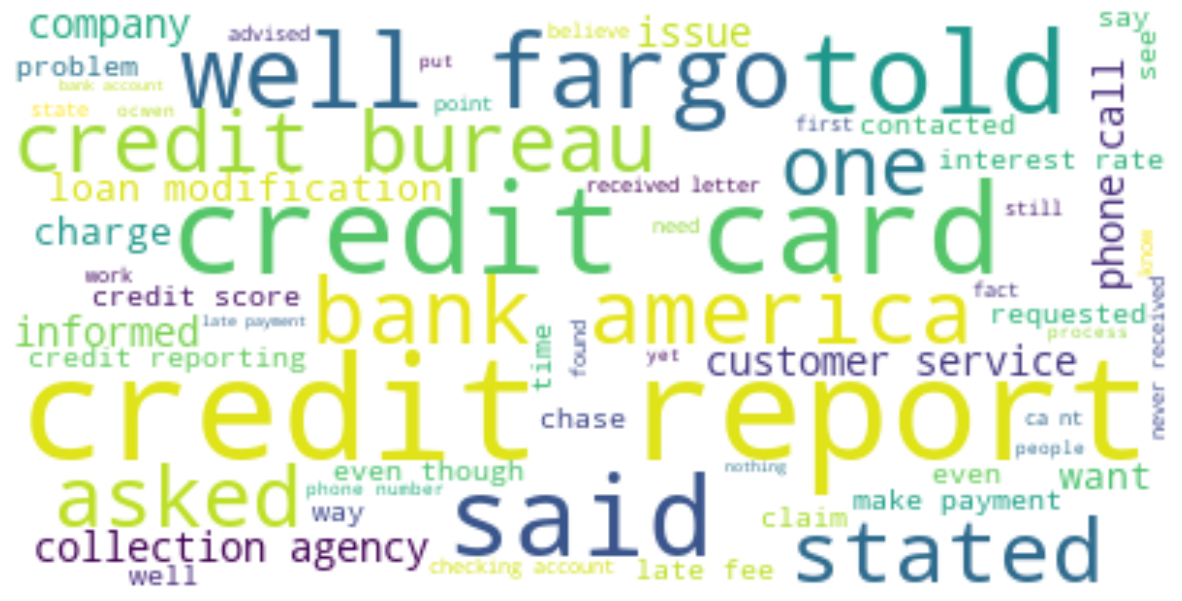

In [23]:
from collections import Counter

from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60, 
                      max_words=60, 
                      background_color="white", 
                      random_state=100).generate(str(Counter(comp1_clean['complaints_clean'])))
plt.figure(figsize=[15,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

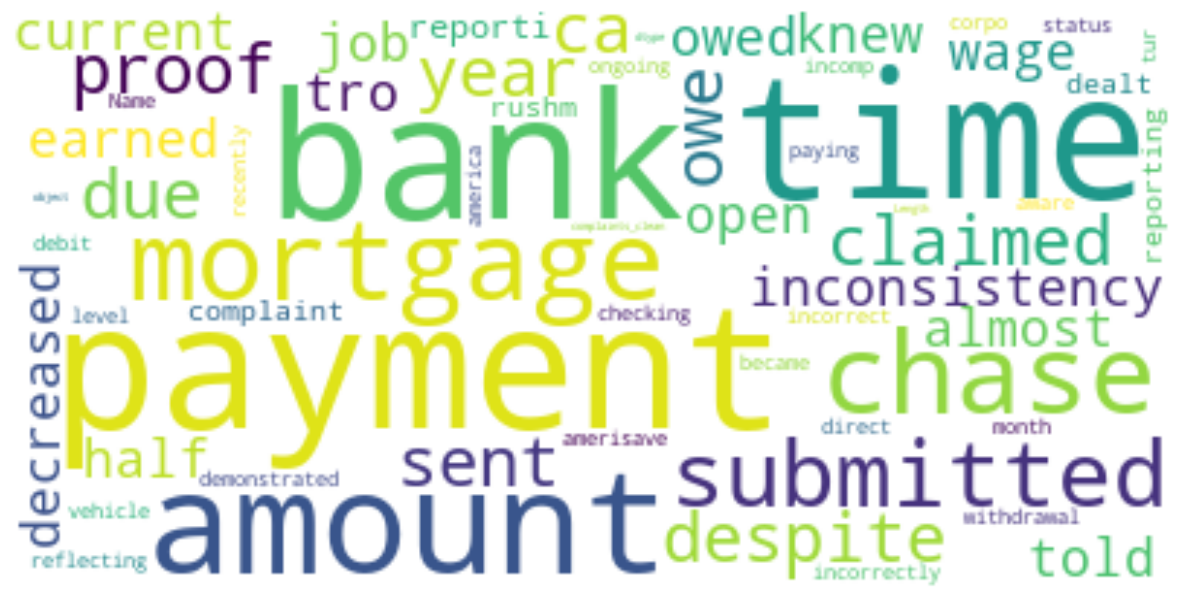

In [24]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60, 
                      max_words=60, 
                      background_color="white", 
                      random_state=100).generate(str(comp1_clean['complaints_clean']))
plt.figure(figsize=[15,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating a function to extract top ngrams(unigram/bigram/trigram) based on the function inputs

def top_ngrams(text,n=None, n_grams=(1,1)):
    rev_model = CountVectorizer(ngram_range=n_grams).fit(text)
    rev_df = rev_model.fit_transform(text)
    
    sum_words = rev_df.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word,idx in rev_model.vocabulary_.items()]
    word_freq = sorted(word_freq, key= lambda x : x[1], reverse= True)
    return word_freq[:n]

In [26]:
n=30
unigram_top30 = top_ngrams(comp1_clean['complaints_clean'],n=n)
unigram_top30_data = pd.DataFrame(unigram_top30, columns = ['unigram', 'count'])
unigram_top30_data

,unigram,count
0,credit,87341
1,account,84618
2,payment,68630
3,loan,55093
4,would,48026
5,bank,45015
6,time,41407
7,report,38396
8,debt,37122
9,told,36807


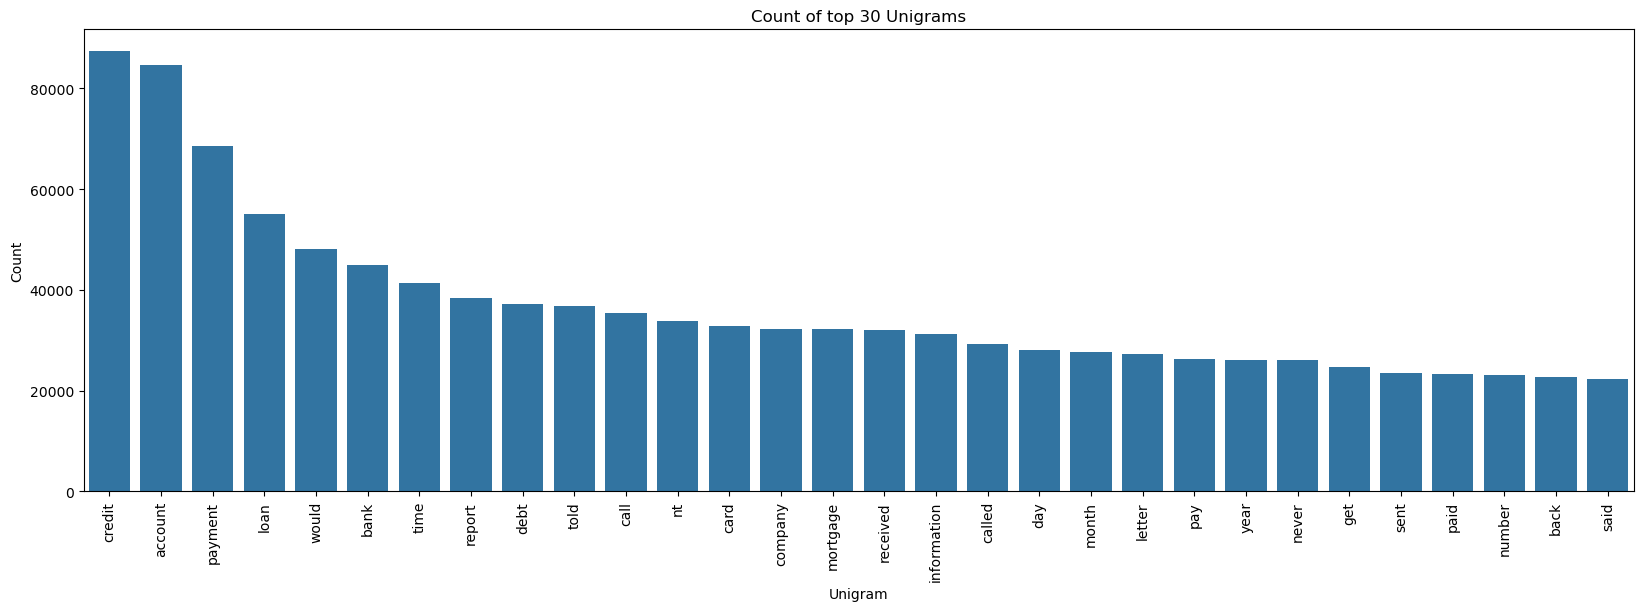

In [27]:
plt.figure(figsize=[20,6])
sns.barplot(x=unigram_top30_data['unigram'], y=unigram_top30_data['count'])
plt.xticks(rotation=90)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

In [28]:
n=30
n_grams = (2,2)

bigram_top30 = top_ngrams(comp1_clean['complaints_clean'],n=n, n_grams=n_grams)
bigram_top30_data = pd.DataFrame(bigram_top30, columns = ['unigram', 'count'])
bigram_top30_data

,unigram,count
0,credit report,22887
1,credit card,14435
2,well fargo,8878
3,bank america,7035
4,credit bureau,6398
5,collection agency,6006
6,customer service,5697
7,phone call,5291
8,credit reporting,4776
9,loan modification,4509


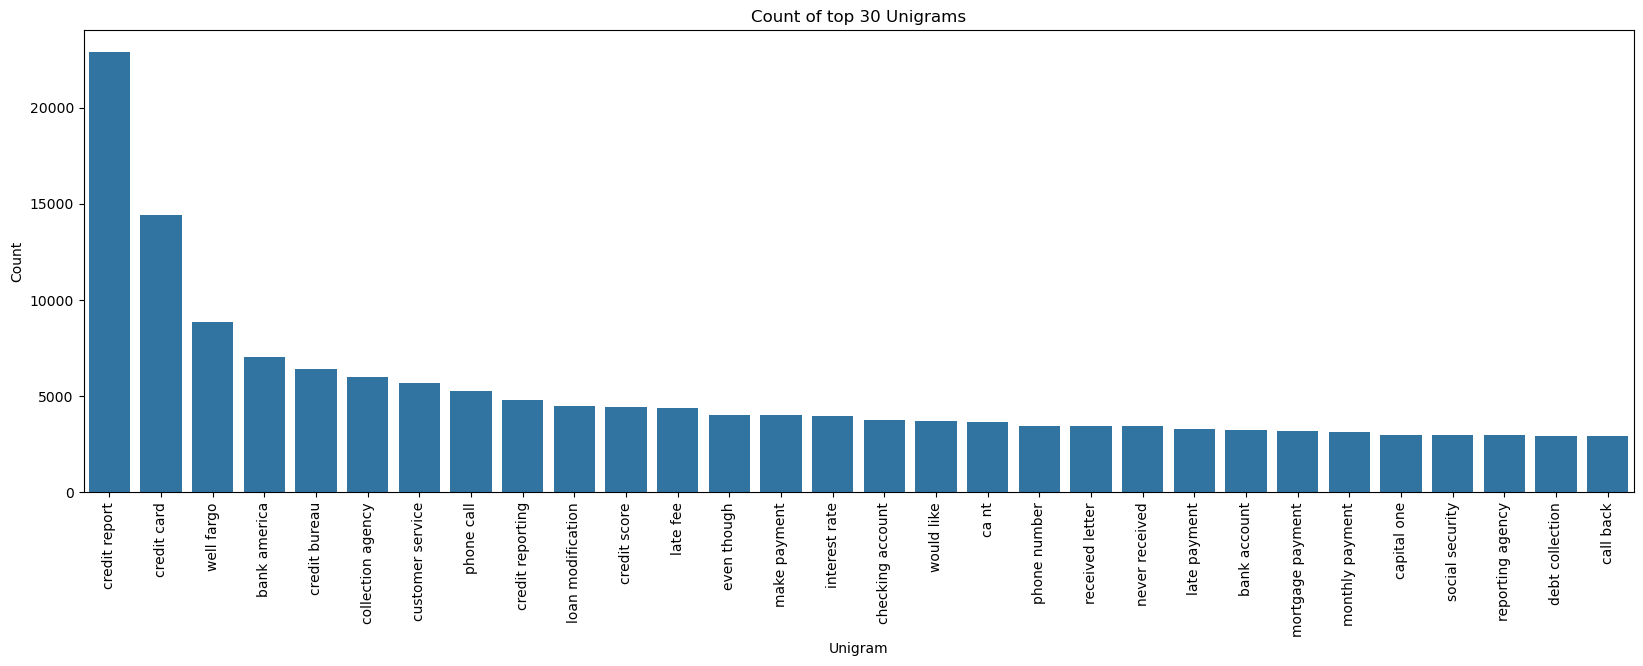

In [29]:
plt.figure(figsize=[20,6])
sns.barplot(x=bigram_top30_data['unigram'], y=bigram_top30_data['count'])
plt.xticks(rotation=90)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

In [30]:
n=30
n_grams = (3,3)

trigram_top30 = top_ngrams(comp1_clean['complaints_clean'],n=n, n_grams=n_grams)
trigram_top30_data = pd.DataFrame(trigram_top30, columns = ['unigram', 'count'])
trigram_top30_data

,unigram,count
0,credit reporting agency,2198
1,social security number,1587
2,fair credit reporting,1286
3,credit reporting act,1260
4,credit card account,1152
5,credit card company,1133
6,removed credit report,1042
7,information credit report,961
8,account credit report,932
9,debt collection practice,903


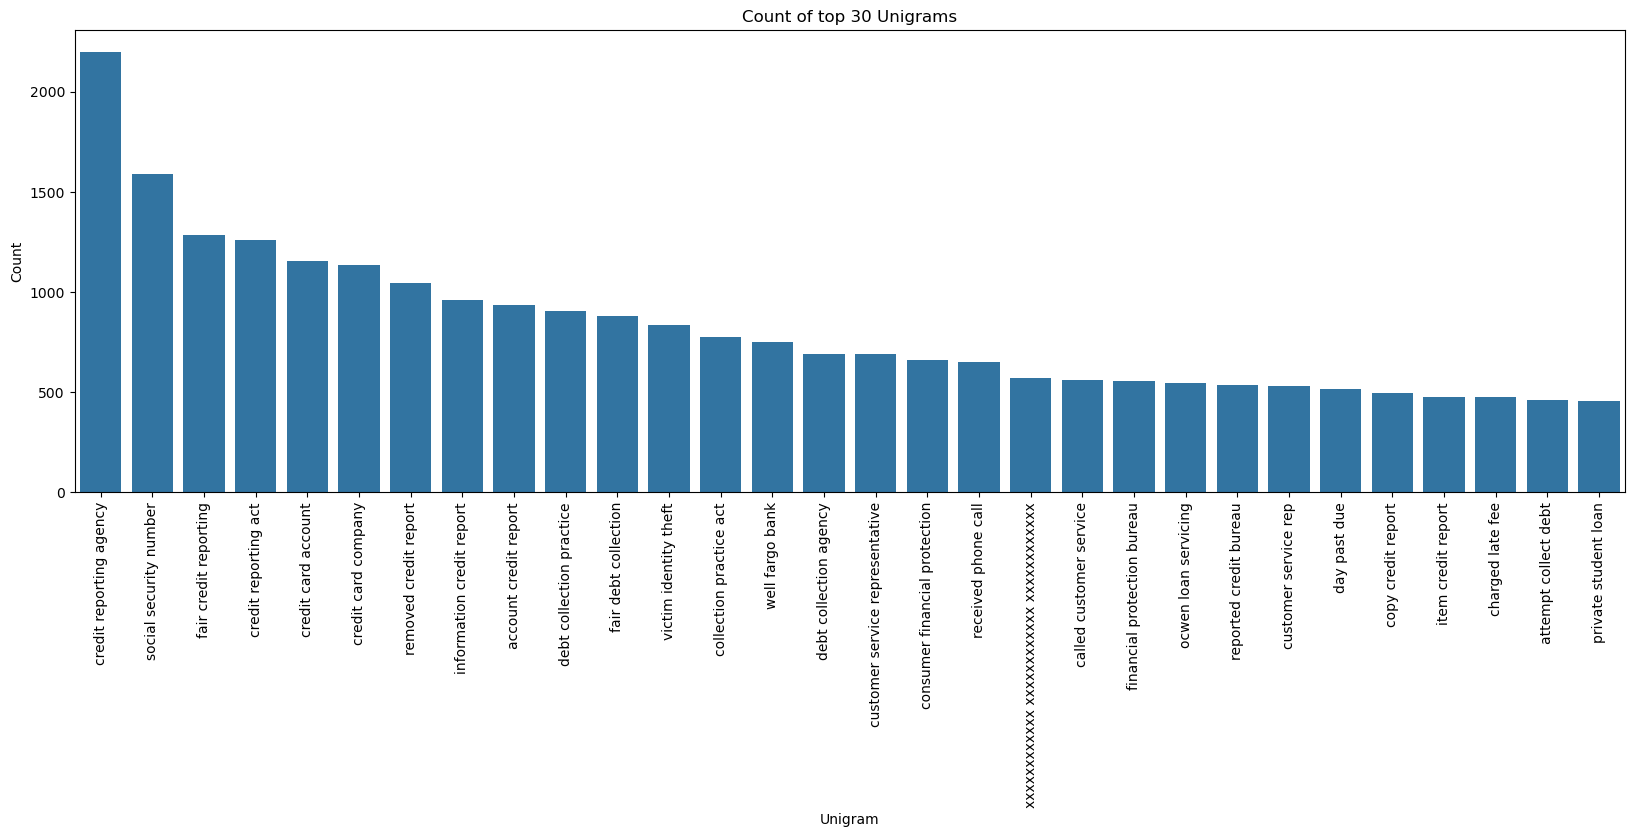

In [31]:
plt.figure(figsize=[20,6])
sns.barplot(x=trigram_top30_data['unigram'], y=trigram_top30_data['count'])
plt.xticks(rotation=90)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(min_df = 2, max_df = 0.95)

tfidf_df = tfidf_model.fit_transform(comp1_clean['complaints_clean'])
tfidf_df

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3782507 stored elements and shape (66806, 24742)>

In [33]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5,
                                      learning_method='online',
                                      max_iter=20,
                                      random_state=42)

In [34]:
X_topics = lda_model.fit_transform(tfidf_df)

In [35]:
n_top_words = 15
topic_summaries = []

topic_word = lda_model.components_  # get the topic words

In [36]:
vocab = tfidf_model.get_feature_names_out()

In [37]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))

Topic 0: payment | loan | account | bank | card | mortgage | would | credit | told | time | nt | month | fee | pay | money
Topic 1: call | debt | number | phone | calling | called | company | stop | work | message | cell | time | name | asked | told
Topic 2: debt | limitation | fdcpa | court | statute | violation | law | judgment | usc | alleged | act | garnishment | firm | midland | statue
Topic 3: credit | report | account | debt | collection | reporting | information | agency | experian | equifax | removed | dispute | company | bureau | letter
Topic 4: ally | scottrade | freeze | affidavit | star | flagstar | west | wallet | nation | allied | chexsystems | capitalone | notarized | interstate | stole


In [38]:
no_topics = 5
words = np.array(vocab)
topic_words = pd.DataFrame(np.zeros((no_topics, 15)), index=[f'Topic {i + 1}' for i in range(no_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)
for i in range(no_topics):
    ix = topic_word[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,payment,loan,account,bank,card,mortgage,would,credit,told,time,nt,month,fee,pay,money
Topic 2,call,debt,number,phone,calling,called,company,stop,work,message,cell,time,name,asked,told
Topic 3,debt,limitation,fdcpa,court,statute,violation,law,judgment,usc,alleged,act,garnishment,firm,midland,statue
Topic 4,credit,report,account,debt,collection,reporting,information,agency,experian,equifax,removed,dispute,company,bureau,letter
Topic 5,ally,scottrade,freeze,affidavit,star,flagstar,west,wallet,nation,allied,chexsystems,capitalone,notarized,interstate,stole


In [39]:
topic_results = lda_model.transform(tfidf_df)

#assigning best results to the topics 
comp1_clean['Topic'] = topic_results.argmax(axis=1)
comp1_clean

,complaints,product,complaints_clean,Topic
190126,XXXX has claimed I owe them {$27.00} for XXXX ...,Debt collection,claimed owe year despite proof payment sent ca...,3
190135,Due to inconsistencies in the amount owed that...,Consumer Loan,due inconsistency amount owed told bank amount...,0
190155,In XX/XX/XXXX my wages that I earned at my job...,Mortgage,wage earned job decreased almost half knew tro...,0
190207,I have an open and current mortgage with Chase...,Mortgage,open current mortgage chase bank chase reporti...,3
190208,XXXX was submitted XX/XX/XXXX. At the time I s...,Mortgage,submitted time submitted complaint dealt rushm...,0
...,...,...,...,...
553084,"XXXX XXXX is reporting incorrectly, payments h...",Credit reporting,reporting incorrectly payment time vehicle tur...,0
553085,Reflecting incorrect payment status. Have been...,Credit reporting,reflecting incorrect payment status time,3
553086,I have been paying {$180.00} a month through d...,Payday loan,paying month direct debit withdrawal checking ...,0
553090,I recently became aware that Amerisave Mortgag...,Mortgage,recently became aware amerisave mortgage corpo...,0


In [40]:
comp1_clean['Topic'].value_counts()

Topic
0    44728
3    16832
1     4922
2      263
4       61
Name: count, dtype: int64

In [41]:
comp1_clean_sort=comp1_clean.groupby('Topic').head(5)
comp1_clean_sort.sort_values('Topic')

,complaints,product,complaints_clean,Topic
190135,Due to inconsistencies in the amount owed that...,Consumer Loan,due inconsistency amount owed told bank amount...,0
190155,In XX/XX/XXXX my wages that I earned at my job...,Mortgage,wage earned job decreased almost half knew tro...,0
190208,XXXX was submitted XX/XX/XXXX. At the time I s...,Mortgage,submitted time submitted complaint dealt rushm...,0
190238,This complaint is against Wells Fargo Bank for...,Mortgage,complaint well fargo bank violation term condi...,0
190251,I spoke to XXXX of green tree representatives ...,Mortgage,spoke green tree representative annual escrow ...,0
192594,This debt collector has called me numerous tim...,Debt collection,debt collector called numerous time private nu...,1
192057,I have been receiving repeated calls from a pr...,Debt collection,receiving repeated call private number work an...,1
192412,I 'm receiving calls from a company who will n...,Payday loan,receiving call company give name threatening l...,1
194250,SOMEONE USE MY INFORMATION. THIS ISNT MY ACCOU...,Credit reporting,someone use information isnt account,1
195000,This individual has called me almost every sin...,Debt collection,individual called almost every single day rega...,1


In [42]:
Topic_names = { 0:"Loan Department", 1:"Theft/dispute reporting", 2: "Bank Account Service",
               3:"Other", 4:" Customer Service" }
#Replace Topics with Topic Names
comp1_clean['Topic'] = comp1_clean['Topic'].map(Topic_names)
comp1_clean

,complaints,product,complaints_clean,Topic
190126,XXXX has claimed I owe them {$27.00} for XXXX ...,Debt collection,claimed owe year despite proof payment sent ca...,Other
190135,Due to inconsistencies in the amount owed that...,Consumer Loan,due inconsistency amount owed told bank amount...,Loan Department
190155,In XX/XX/XXXX my wages that I earned at my job...,Mortgage,wage earned job decreased almost half knew tro...,Loan Department
190207,I have an open and current mortgage with Chase...,Mortgage,open current mortgage chase bank chase reporti...,Other
190208,XXXX was submitted XX/XX/XXXX. At the time I s...,Mortgage,submitted time submitted complaint dealt rushm...,Loan Department
...,...,...,...,...
553084,"XXXX XXXX is reporting incorrectly, payments h...",Credit reporting,reporting incorrectly payment time vehicle tur...,Loan Department
553085,Reflecting incorrect payment status. Have been...,Credit reporting,reflecting incorrect payment status time,Other
553086,I have been paying {$180.00} a month through d...,Payday loan,paying month direct debit withdrawal checking ...,Loan Department
553090,I recently became aware that Amerisave Mortgag...,Mortgage,recently became aware amerisave mortgage corpo...,Loan Department


In [43]:
comp1_clean['product'].value_counts()

product
Debt collection            17552
Mortgage                   14919
Credit reporting           12526
Credit card                 7929
Bank account or service     5711
Consumer Loan               3678
Student loan                2128
Prepaid card                 861
Payday loan                  726
Money transfers              666
Other financial service      110
Name: count, dtype: int64

In [44]:
comp1_clean['Topic'].value_counts()

Topic
Loan Department            44728
Other                      16832
Theft/dispute reporting     4922
Bank Account Service         263
 Customer Service             61
Name: count, dtype: int64

In [45]:
data = comp1_clean[['complaints', 'Topic']]
data 

,complaints,Topic
190126,XXXX has claimed I owe them {$27.00} for XXXX ...,Other
190135,Due to inconsistencies in the amount owed that...,Loan Department
190155,In XX/XX/XXXX my wages that I earned at my job...,Loan Department
190207,I have an open and current mortgage with Chase...,Other
190208,XXXX was submitted XX/XX/XXXX. At the time I s...,Loan Department
...,...,...
553084,"XXXX XXXX is reporting incorrectly, payments h...",Loan Department
553085,Reflecting incorrect payment status. Have been...,Other
553086,I have been paying {$180.00} a month through d...,Loan Department
553090,I recently became aware that Amerisave Mortgag...,Loan Department


In [46]:
Topic_names1 = { "Loan Department": 0, "Theft/dispute reporting": 1, "Bank Account Service": 2,
               "Other" : 3, " Customer Service": 4 }
#Replace Topics with Topic Names
data['Topic'] = data['Topic'].map(Topic_names1)
data

,complaints,Topic
190126,XXXX has claimed I owe them {$27.00} for XXXX ...,3
190135,Due to inconsistencies in the amount owed that...,0
190155,In XX/XX/XXXX my wages that I earned at my job...,0
190207,I have an open and current mortgage with Chase...,3
190208,XXXX was submitted XX/XX/XXXX. At the time I s...,0
...,...,...
553084,"XXXX XXXX is reporting incorrectly, payments h...",0
553085,Reflecting incorrect payment status. Have been...,3
553086,I have been paying {$180.00} a month through d...,0
553090,I recently became aware that Amerisave Mortgag...,0


In [47]:
count_model1 = CountVectorizer()
data_cv = count_model1.fit_transform(data['complaints'])

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_trasformer = TfidfTransformer()
data_tfidf = tfidf_trasformer.fit_transform(data_cv)

tfidf_model1 = TfidfVectorizer()
tfidf_vect = tfidf_model1.fit_transform(data['complaints'])

In [49]:
x= tfidf_vect
y= data['Topic']


print(y.head())

190126    3
190135    0
190155    0
190207    3
190208    0
Name: Topic, dtype: int64


In [50]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [51]:
ytrain.value_counts()

Topic
0    31272
3    11852
1     3419
2      182
4       39
Name: count, dtype: int64

In [52]:
ytest.value_counts()

Topic
0    13456
3     4980
1     1503
2       81
4       22
Name: count, dtype: int64

## Logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

modellg = LogisticRegression(max_iter=1000)

# Train the model
modellg.fit(xtrain, ytrain)

# Make predictions
ypred = modellg.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy}')

# Create a confusion matrix
cm = confusion_matrix(ytest, ypred)

print(ypred)

Accuracy: 0.93353956690949
[0 0 0 ... 0 0 0]


## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_depth=3, max_features='sqrt')

# Train the classifier
DT.fit(xtrain, ytrain)

# Make predictions
y_pred = DT.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, ypred)
report = classification_report(ytest, ypred)

print(y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


[0 0 0 ... 0 0 0]
Accuracy: 0.93353956690949
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     13456
           1       0.88      0.82      0.85      1503
           2       0.88      0.26      0.40        81
           3       0.90      0.91      0.90      4980
           4       0.00      0.00      0.00        22

    accuracy                           0.93     20042
   macro avg       0.72      0.59      0.62     20042
weighted avg       0.93      0.93      0.93     20042



## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf=2, max_depth=5, max_features='sqrt')

# Train the classifier
rf.fit(xtrain, ytrain)

# Make predictions
ypred1 = rf.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, ypred1)
report = classification_report(ytest, ypred1)

print(ypred1)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


[0 0 0 ... 0 0 0]
Accuracy: 0.6713900808302564
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     13456
           1       0.00      0.00      0.00      1503
           2       0.00      0.00      0.00        81
           3       0.00      0.00      0.00      4980
           4       0.00      0.00      0.00        22

    accuracy                           0.67     20042
   macro avg       0.13      0.20      0.16     20042
weighted avg       0.45      0.67      0.54     20042



In [56]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## Neural Network

In [59]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Convert the target variable to categorical format
y_categorical = to_categorical(data['Topic'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(tfidf_vect, y_categorical, test_size=0.3, random_state=42)

# Determine the number of samples and features
n_samples = x_train.shape[0]
n_features = x_train.shape[1]

# Create the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(n_features,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))  # Number of topics

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Print the model summary
model.summary()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    mode='max',
    restore_best_weights=True,
    verbose=1
)

# Train the model
batch_size = 64
epochs = 10
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=early_stopping
)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_accuracy}')

# Make predictions
y_pred2 = model.predict(x_test)
print(y_pred2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │     6,922,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,930,949 (26.44 MB)

 Trainable params: 6,930,949 (26.44 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.8141 - loss: 36397653105311744.0000 - val_accuracy: 0.9422 - val_loss: 0.1583
Epoch 2/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.9450 - loss: 19557657568346112.0000 - val_accuracy: 0.9436 - val_loss: 2701891179905024.0000
Epoch 3/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.9493 - loss: 18543173408129024.0000 - val_accuracy: 0.9443 - val_loss: 1734023252541440.0000
Epoch 4/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.9390 - loss: 15412033801420800.0000 - val_accuracy: 0.9281 - val_loss: 7502835419709440.0000
Epoch 5/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 30s 41ms/step - accuracy: 0.8832 - loss: 9230470982139904.0000 - val_accuracy: 0.7305 - val_loss: 1010151231747917119989219328.0000
Epoch 6/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.5107 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.000

In [65]:
import joblib

joblib.dump(tfidf_model1, 'tfidf_vectorizer.pkl')
joblib.dump(model, 'model.pkl')


['model.pkl']

In [66]:
model.save("model.h5")